# Exercise 1 

## Creating a square class

Throughout scientific computing and software engineering, processes are vectorised and there are regular matrix operations. This is also applicable to materials science and understanding matrix and tensor operations are essential to many different areas of engineering. Here, we will remind you have what matrix multiplication is and how it can be used, and the exercises will involve creating functions that do and visualise matrix transformations on objects.

> Part I - Create a class called `Square`, which should be initialised with the position of the centre of mass and the length of its side. Add a method to visualise the square by printing its sides (note: initially, the sides of the square are assumed to be parallel to the x (1 0) and y (0 1) axes.

### Matrix transformations in 2D

As a reminder of what a matrix transformation is:

\begin{equation}
    \begin{bmatrix}
        m_{00} & m_{01} \\
        m_{10} & m_{11}
    \end{bmatrix}\begin{bmatrix}
        x_0 \\
        x_1
    \end{bmatrix} = \begin{bmatrix}
        x'_0 = m_{00}x_0 + m_{01}x_1\\
        x'_1 = m_{10}x_0 + m_{11}x_1
    \end{bmatrix}
\end{equation}

> Part II - Create a method called `Square.apply_matrix(matrix: np.ndarray)` that allows the Square to be transformed by an arbitrary matrix

To scale a vector in the x-direction by $k_x$ and in the y-direction by $k_y$, we use the following matrix (note that for enlarging by the same amount along each axis then $k_x=k_y$):

\begin{equation}
    \begin{bmatrix}
        k_x & 0 \\
        0 & k_y
    \end{bmatrix}\begin{bmatrix}
        x_0 \\
        x_1
    \end{bmatrix} = \begin{bmatrix}
        k_xx_0 \\
        k_yx_1
    \end{bmatrix}
\end{equation}

> Part IIIa - Create a method called `Square.scale(factor: float)` that enlarges the `Square`

To rotate a vector by an angle $\theta$ in the clockwise direction, we apply the following matrix:

\begin{equation}
    \begin{bmatrix}
        cos\theta  & sin\theta \\
        -sin\theta & cos\theta
    \end{bmatrix}\begin{bmatrix}
        x_0 \\
        x_1
    \end{bmatrix} = \begin{bmatrix}
        x_0cos\theta  + x_1sin\theta \\
        -x_0sin\theta + x_1cos\theta
    \end{bmatrix}
\end{equation}

> Part IIIb - Create a method called `Square.rotate(angle: float)` that rotates the `Square`

(0.0, 0.0) (1.0, 0.0) (1.0, 1.0) (0.0, 1.0)


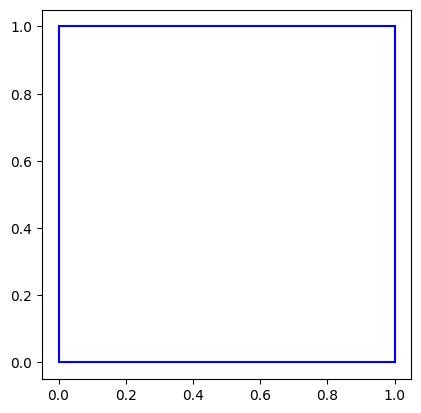

array([[ 0.0000000e+00,  0.0000000e+00],
       [ 1.2246468e-16, -2.0000000e+00],
       [ 2.0000000e+00, -2.0000000e+00],
       [ 2.0000000e+00,  1.2246468e-16]])

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

class Square:
    def __init__(self, length: float, centerx: float, centery: float):
        self.length = length
        self.centerx = centerx
        self.centery = centery
        self.half_length = self.length / 2
        # Define corner points as instance variables
        self.x0, self.y0 = self.centerx - self.half_length, self.centery - self.half_length  # Bottom-left corner
        self.x1, self.y1 = self.centerx + self.half_length, self.centery - self.half_length  # Bottom-right corner
        self.x2, self.y2 = self.centerx + self.half_length, self.centery + self.half_length  # Top-right corner
        self.x3, self.y3 = self.centerx - self.half_length, self.centery + self.half_length  # Top-left corner

    
    def visualisation(self):
        """ method to visualise the square by printing 
            its sides (note: initially, the sides of 
            the square are assumed to be parallel to the x 
            (1 0) and y (0 1) axes """
        
        # Print the coordinates of the corners
        print((self.x0, self.y0), (self.x1, self.y1), (self.x2, self.y2), (self.x3, self.y3))
        
        # Plot each side of the square line by line
        plt.plot([self.x0, self.x1], [self.y0, self.y1], 'b-')  # Bottom side
        plt.plot([self.x1, self.x2], [self.y1, self.y2], 'b-')  # Right side
        plt.plot([self.x2, self.x3], [self.y2, self.y3], 'b-')  # Top side
        plt.plot([self.x3, self.x0], [self.y3, self.y0], 'b-')  # Left side
        
        plt.gca().set_aspect('equal', adjustable='box')
        plt.show()
        
    def apply_matrix(self, matrix: np.array):
        # Transform the square by an arbitrary matrix
        corners = np.array([
            [self.x0, self.y0],
            [self.x1, self.y1],
            [self.x2, self.y2],
            [self.x3, self.y3]
        ])
        
        # Apply the transformation matrix to each corner
        transformed_corners = np.dot(corners, matrix)
        return transformed_corners
    
    def scale(self,factor:float):
       return np.dot(self.apply_matrix(matrix),factor)
    
    def rotate(self,angle:float):
        return np.dot(self.scale(factor),angle)
        
matrix = np.array([[1, 0], [0, 1]])
factor = np.array([[2,0 ], [0, 2]])
angle = np.array([[np.cos(np.pi/2), -np.sin(np.pi/2)], [np.sin(np.pi/2), np.cos(np.pi/2)]])
squareA = Square(1, 0.5, 0.5)   
squareA.visualisation()
squareA.scale(factor)
squareA.rotate(angle)

    

## Advanced: Creating a cube class

If you first want to do something a bit more diffrent, skip this part and go to the next exercise. If you feel you need a bit more exercise on using matrices, continue with this exercise.

1. Create a class called `Cube(x: float, y: float, z: float, L: float, vec:)`:
    - `(x, y, z)` should describe the centre of mass (this can also be done using a `numpy` array)
    - `L` describes the side length
    
2. Add the following properties:
    - `Cube.volume(self) -> float`
        - returns volume of the Cube
    - `Cube.surface_area(self) -> float`
        - returns the surface area of the Cube
3. Add the following methods:
    - `Cube.rotate(vector: np.ndarray, angle: float)`
        - rotates the Cube clockwise around a vector by an angle
    - `Cube.plot_z_projection(...)`
        - plots a projection of the Cube on the 2D z=0 plane
    - `Cube.apply_matrix(matrix: np.ndarray)`
        - applies a 3x3
    - `Cube.plot3D()`
        - makes a 3D axis and plot the cube 

# Exercise 2 

The exercise for this section follows on from the final part of Lecture 202. In this part we will generate a random set of particles, and then using this set of particles, calculate a function used in statistical mechanics as the radial distribution function, $g(r)$, which in two dimensios looks like this:
\begin{align}
g(r) = 2\pi r \rho (r)
\end{align}
The mathematical definition can be considered daunting, but $g(r)$ has a simple meaning. It can be described as the probability of selecting any two particles in a system and for them to be a distance of $r$ apart. This translates into the following algorithm, for a set of particles.

1. For each pair of particles in a system, calculate the distance between them and store it.
2. Once all distances have been calculated, create a histogram of these distances

To investigate $g(r)$, we are going to quickly generate a 2D pseudo-FCC crystal structure and plot its $g(r)$. To do this, we will conduct the following steps:

1. Generate the particles in 2D using `numpy` and `scipy`
2. Use `scipy.spatial.distance.pdist` to get the distances between the atoms
3. Use `seaborn` to visualise the particles
4. Use `numpy.histogram` to get a histogram of the distances
5. Use `matplotlib` to plot the histogram which is essentially $g(r)$

To generate a 2D hexagonal close packed system of particles using cartesian co-ordinates. There are three things that are needed, the height between rows, the distance between particles in the same row and the offset between the first particle of an odd row, and the first particle of an even row. The distance between particles in the same row is the inter-particle distance, which we shall call $\alpha$ (`alpha`), from which the other distances can be calculated. The height is given by the height of an equililateral triangle, $h=\frac{\sqrt 3}{2}\alpha$ and the offset is just half of $\frac{\alpha}{2}$.

To calculate the distances, we can use `scipy.spatial.distance.pdist` (seen in Lecture 201) and use the direct result from that.

The histogram generation was seen in Lecture 102. The plotting should be straightforward, and hopefully you will have an opportunity to experiment with `seaborn`.

## Extra part

Once you have completed the first part, if you want a harder challenge try to do the following. First:

1. Combine the $g(r)$ plot and particle visualisation in a set of two subplots
2. Add an interactive slider that allows a user to change `alpha` and see in real time how $g(r)$ and the particles change

And if you have more time, try this:

3. Add a random displacement to all the particles in the system. This displacement should be extracted from a Gaussian distribution with mean zero, whereas the variance is an arbitrary input value. The displacement should be different (and independent) for each particle and each coordinate of the same particle. 
4. Repeat point 2 above but now make the variance the variable that can be changed instead of `alpha`. What do you observe? 

In [ ]:
# Part of the code for Exercise 2 is provided here:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from typing import Tuple


def generate_close_packed(
    alpha: float, 
    dimensions: Tuple[float, float]
) -> np.ndarray:
    height = (np.sqrt(3) / 2) * alpha
    offset = alpha / 2
    # use a numpy/scipy generator to generate a Nx2 array
    # >>>
    
    # <<<
    return

def get_distances(array: np.ndarray) -> np.ndarray:
    # use scipy.spatial.distance to measure the distances
    # between all of the particles
    # >>>
    
    # <<<
    return

def add_random_displacement(array: np.ndarray) -> np.ndarray:
    # Note: use variance * np.random.normal() provides a random displacement with mean zero and the correct
    # variance
    # >>>
    
    # <<<
    return


def histogram(
    distances: np.ndarray, 
    n_bins: int
) -> np.ndarray:
    # ensure that the distances array is 1D
    assert distances.shape[0] == 1 or len(distances.shape) == 1
    
    # use np.histogram to create the histograms
    # >>>
    
    # <<<
    return

def plot_particles(array: np.ndarray):
    # use seaborn to plot the positions of the particles
    # >>>
    
    # <<<
    return

def plot_histogram(bins: np.ndarray, counts: np.ndarray):
    # initialise axes
    fig, ax = plt.subplots()
    
    # pre-formatting
    # >>>
    
    # <<<
    
    # plotting
    bin_width = bins[1]-bins[0]
    ax.bar(bins, counts, width=bin_width)
    
    # show
    plt.show()
    